# k-scheduling tests

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from random import sample, seed
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.algorithms import amplitude_estimators, EstimationProblem
from qiskit.algorithms import IterativeAmplitudeEstimation as BaseIterativeAmplitudeEstimation

from algorithms import IterativeAmplitudeEstimation, ModifiedIterativeAmplitudeEstimation
from algorithms import NoQuantumIterativeAmplitudeEstimation
from operators import *

In [2]:
# for setting a single amplitude, below automates this for arbirtrary numbers of amplitudes
n = 4
N = 2**n
k = N//2
marked = sample(range(N), k)

In [3]:
# Define the estimation problem and oracle function
def make_problems(n, marked):
    
    def good_state(state):
        bin_marked = [(n-len(bin(s))+2)*'0'+bin(s)[2:] for s in marked]
        return (state in bin_marked)

    problem = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )

    problem2 = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )
    
    return problem, problem2

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 256+128

## IQAE: attempt exponential decay in the number of shots per iteration to account for deeper circuits.

In [5]:
# parameters for IQAE

# amplitudes
n = 5
k = 2**n

# epsilons
powers = range(2,7)
epsilons = [(1.0 / (10**power)) for power in powers]

# other
alpha = 0.05
confint_method = 'chernoff'
verbose = False

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
a: 1.0
Modified IAE estimations: [0.9998654160648979, 0.9999987083376854, 0.9999999845785056, 0.9999999998346512, 0.9999999999981801]
Default IAE estimations: [0.9998654160648979, 0.9999987083376854, 0.9999999845785056, 0.9999999998346512, 0.9999999999981801]


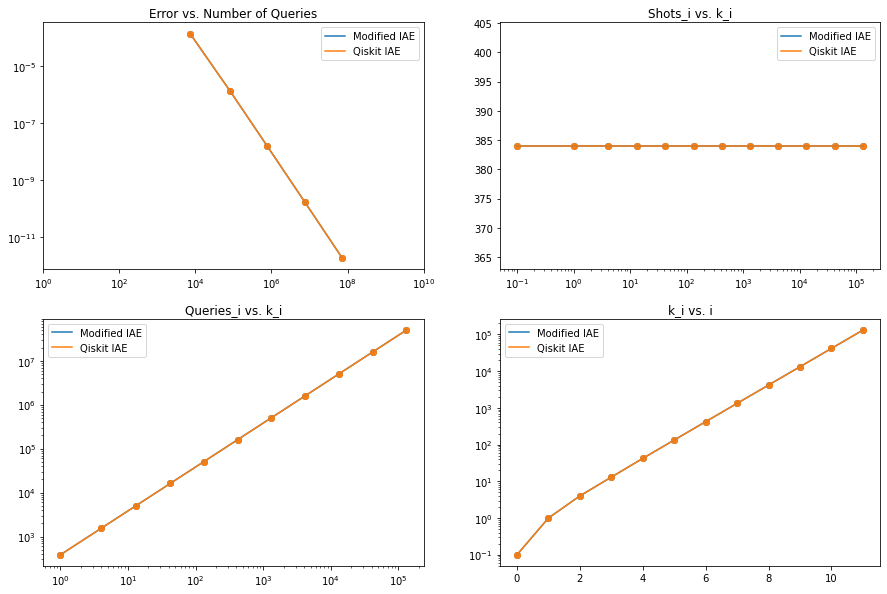

0.4999999999999999
0.4999999999999999
0.5000000000000001
0.4999999999999998
0.5000000000000018
0.4999999999999999
0.5000000000000001
0.4999999999999998
0.5000000000000001
0.49999999999999833
0.49999999999999534
0.4999999999999999
0.5000000000000001
0.4999999999999998
0.5000000000000018
0.5000000000000032
0.500000000000015
0.5000000000000208
0.49999999999998657
0.5000000000004471
0.4999999999999999
0.4999999999999999
0.5000000000000001
0.4999999999999998
0.5000000000000001
0.5000000000000018
0.49999999999999534
0.5000000000000621
0.5000000000000561
0.4999999999995496
0.4999999999993913
0.4999999999999999
0.4999999999999999
0.5000000000000001
0.5000000000000002
0.5000000000000017
0.4999999999999996
0.4999999999999905
0.4999999999999718
0.49999999999985517
0.5000000000003119
0.49999999999961636
0.5000000000003054
0.500000000010063
0.5000000000100039
a: 0.5
Modified IAE estimations: [0.5002124976551993, 0.5000097259707503, 0.5000054460354197, 0.4999999999999999, 0.4999999827977415]
Default

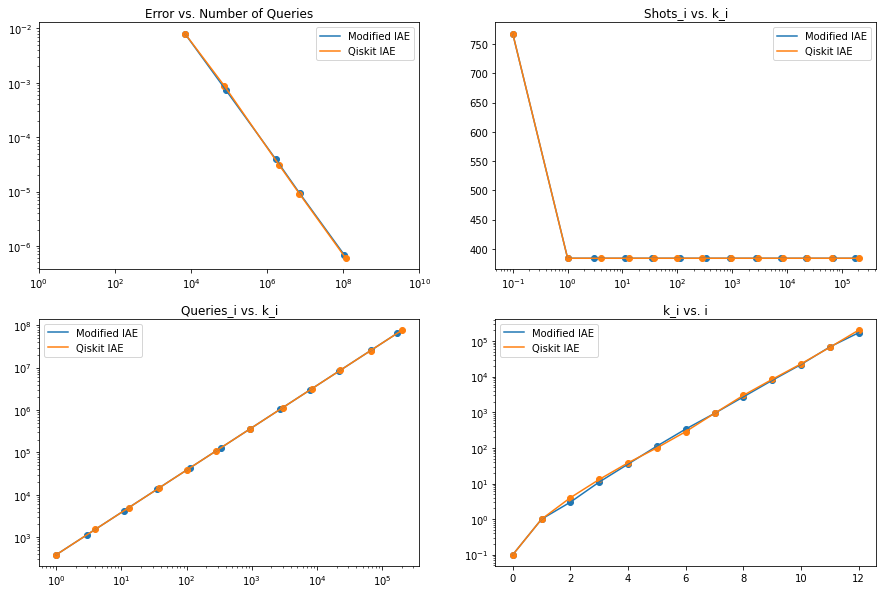

0.24999999999999994
0.24999999999999994
0.24999999999999994
0.24999999999999994
0.25000000000000033
0.25000000000000033
0.24999999999999928
0.24999999999999928
0.2500000000000032
0.24999999999999994
0.24999999999999994
0.24999999999999994
0.24999999999999994
0.25000000000000033
0.25000000000000033
0.24999999999999928
0.25000000000000155
0.24999999999999833
0.2500000000000022
0.2499999999999818


KeyboardInterrupt: 

In [6]:
# stats recording
iae_epsilon = []
iae_nshots = []
miae_epsilon = []
miae_nshots = []

while k >= 1:
    
    # setup problems with specified N,k
    N = 2**n
    marked = sample(range(N), k)
    problem, problem2 = make_problems(n, marked)
    
    # execute experiments for each power
    miae_results = [] 
    iae_results = []
    
    for i, epsilon in enumerate(epsilons):
        if verbose:
            print('ε:',epsilon)
            
        MIAE = NoQuantumIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                           alpha=alpha, 
                                           confint_method=confint_method, 
                                           quantum_instance=aer_sim)
        
        IAE = IterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                alpha=alpha, 
                                                confint_method=confint_method, 
                                                quantum_instance=aer_sim)
        
        # configure the number of shots this way and pray that it works
        MIAE._quantum_instance._run_config.shots = shots
        IAE._quantum_instance._run_config.shots = shots
        
        # for recording intermediate algo results
        state = defaultdict(dict)
        state2 = defaultdict(dict)
        
        miae_result = MIAE.estimate(problem,
                                    state=state,
                                    k0=k,
                                    N=N,
                                    verbose=verbose)
        
#         iae_result = IAE.estimate(problem2,
#                                   state=state2,
#                                   verbose=verbose)
        
        miae_results.append(miae_result)
        iae_results.append(iae_result)
        if verbose:
            print()
    
    # process results
    miae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in miae_results]
    miae_nshots_i  = [res.num_oracle_queries for res in miae_results]

    iae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in iae_results]
    iae_nshots_i  = [res.num_oracle_queries for res in iae_results]
    
    print('a:', k/N)
    print('Modified IAE estimations:', [res.estimation for res in miae_results])
    print('Default IAE estimations:', [res.estimation for res in iae_results])
    
    # graph k_i vs num_shots
    def process_state(state):
        if len(state) == 0: return [],[]
        round_shots = state['round_shots']
        queries = state['n_queries']
        shots_at_k0 = round_shots.pop(0)
        queries_at_k0 = queries.pop(0)
    
        k_i = [k for k in round_shots]
        queries_i = [queries[k] for k in k_i]
        shots_i = [shots_at_k0] + [round_shots[k] for k in k_i]
    
        k_i.insert(0, 0.1)
        
        return shots_i, queries_i, k_i
    
    mod_shots, mod_queries, mod_k = process_state(state)
    base_shots, base_queries, base_k = process_state(state2)

    fig,axs = plt.subplots(2,2,figsize=(15,10))
    
    # plot query complexity
    
    axs[0,0].set_yscale('log')
    axs[0,0].set_xscale('log')
    axs[0,0].set_xlim(1, 10**10)
    axs[0,0].set_title('Error vs. Number of Queries')
    
    axs[0,0].scatter(miae_nshots_i, miae_epsilon_i)
    axs[0,0].plot(miae_nshots_i, miae_epsilon_i)
    axs[0,0].scatter(iae_nshots_i, iae_epsilon_i)
    axs[0,0].plot(iae_nshots_i, iae_epsilon_i)
    
    axs[0,0].legend(['Modified IAE', 'Qiskit IAE'])
    
    # plots for shots vs k
    axs[0,1].set_xscale('log')
    axs[0,1].set_title('Shots_i vs. k_i')
    
    axs[0,1].plot(mod_k, mod_shots)
    axs[0,1].scatter(mod_k, mod_shots)
    axs[0,1].plot(base_k, base_shots)
    axs[0,1].scatter(base_k, base_shots)
    
    axs[0,1].legend(['Modified IAE', 'Qiskit IAE'])
    
    # plots for nqueries vs k
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_title('Queries_i vs. k_i')
    
    axs[1,0].plot(mod_k[1:], mod_queries)
    axs[1,0].scatter(mod_k[1:], mod_queries)
    axs[1,0].plot(base_k[1:], base_queries)
    axs[1,0].scatter(base_k[1:], base_queries)
    
    axs[1,0].legend(['Modified IAE', 'Qiskit IAE'])
    
    # plots for k
    axs[1,1].set_yscale('log')
    axs[1,1].set_title('k_i vs. i')
    
    axs[1,1].plot(mod_k)
    axs[1,1].scatter(range(len(mod_k)), mod_k)
    axs[1,1].plot(base_k)
    axs[1,1].scatter(range(len(base_k)), base_k)
    
    axs[1,1].legend(['Modified IAE', 'Qiskit IAE'])
    
    plt.show()
    
    # save results for epsilon vs nshots
    miae_nshots.append(miae_nshots_i)
    miae_epsilon.append(miae_epsilon_i)
    iae_nshots.append(iae_nshots_i)
    iae_epsilon.append(iae_epsilon_i)
    k //= 2
    
iae_nshots = np.array(iae_nshots)

In [ ]:
for i in range(len(epsilons)):
    plt.plot(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])
    plt.scatter(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])
        
plt.legend(['{:.0e}'.format(eps) for eps in epsilons])
plt.xscale('log')
plt.yscale('log')

plt.show()